In [125]:
import pandas as pd
import numpy as np
import functions2  as fc
import matplotlib.pyplot as plt
import seaborn as sns
%config IPCompleter.greedy=True
pd.set_option("display.precision", 2)

<br>

# Récupération des données:

## Evolution de la consommation de volaille 2015-2019:

In [126]:
vola1 = pd.read_csv('1. Volailles (nourriture) (2015 & 2019) (FAOSTAT).csv')
vola1.dtypes

Domaine    object
Zone       object
Élément    object
Produit    object
Année       int64
Unité      object
Valeur      int64
dtype: object

In [127]:
vola1 = vola1.pivot(index='Zone', columns='Année', values='Valeur')

In [128]:
vola1['Evol. volaille (nourr.) (%)'] = (vola1[2019]-vola1[2015])/(vola1[2015])*100
vola1.shape

(180, 3)

In [129]:
vola1.head()

Année,2015,2019,Evol. volaille (nourr.) (%)
Zone,,,
Afghanistan,66,67,1.52
Afrique du Sud,2037,2186,7.31
Albanie,34,34,0.00
Algérie,312,287,-8.01
Allemagne,1450,1504,3.72


<br>

## Ratio importations/disponibilité volailles 2019:

In [130]:
vola2 = pd.read_csv('2. Volailles (imports, dispo) 2019 (FAOSTAT).csv')

In [131]:
vola2 = vola2.pivot(index='Zone', columns='Élément', values='Valeur')

In [132]:
vola2['Importations/Disponibilité volaille (%)']=vola2['Importations - Quantité']/vola2['Disponibilité intérieure']*100
vola2.shape

(180, 3)

>>> #### Modification de la valeur si > à 100% (outliers):

In [133]:
mask = vola2.loc[vola2.index=='Pays-Bas']

In [134]:
mask = mask.drop(columns=['Disponibilité intérieure', 'Importations - Quantité'])
mask.head()

Élément,Importations/Disponibilité volaille (%)
Zone,
Pays-Bas,404.03


In [135]:
vola2.loc[vola2['Importations/Disponibilité volaille (%)']>100, 'Importations/Disponibilité volaille (%)']=100

In [136]:
vola2.head()

Élément,Disponibilité intérieure,Importations - Quantité,Importations/Disponibilité volaille (%)
Zone,,,
Afghanistan,67.0,44.0,65.67
Afrique du Sud,2186.0,488.0,22.32
Albanie,34.0,22.0,64.71
Algérie,287.0,0.0,0.00
Allemagne,1712.0,831.0,48.54


<br>

## Evolution des importations de volailles 2015-2019:

In [137]:
vola3 = pd.read_csv('3. Volailles (imports) (2015 & 2019) (FAOSTAT).csv')

In [138]:
vola3 = vola3.pivot(index='Zone', columns='Année', values='Valeur')
vola3.head()

Année,2015,2019
Zone,,
Afghanistan,43.0,44.0
Afrique du Sud,329.0,488.0
Albanie,21.0,22.0
Algérie,2.0,0.0
Allemagne,750.0,831.0


In [139]:
vola3['Evol. import. (%)'] = (vola3[2019]-vola3[2015])/(vola3[2015])*100
vola3.shape

(180, 3)

In [140]:
vola3.loc[vola3.isnull().any(axis=1)]

Année,2015,2019,Evol. import. (%)
Zone,,,
Bangladesh,0.0,0.0,NaN
Belize,0.0,0.0,NaN
Burkina Faso,0.0,0.0,NaN
Burundi,0.0,0.0,NaN
Inde,0.0,0.0,NaN
Israël,0.0,0.0,NaN
Kenya,0.0,0.0,NaN
Madagascar,0.0,0.0,NaN
Malawi,0.0,0.0,NaN


>>> #### Imputation des valeurs manquantes (problème Zero Division):

In [141]:
vola3.loc[(vola3[2015]==0) & (vola3[2019]==0), 'Evol. import. (%)']=0
vola3.loc[(vola3[2015]==0) & (vola3[2019]!=0), 'Evol. import. (%)']=100

In [142]:
vola3.shape

(180, 3)

>>> #### Modification de la valeur si > à 100% (outliers):

In [143]:
vola3.loc[vola3['Evol. import. (%)']>100, 'Evol. import. (%)']=100

In [144]:
vola3.head()

Année,2015,2019,Evol. import. (%)
Zone,,,
Afghanistan,43.0,44.0,2.33
Afrique du Sud,329.0,488.0,48.33
Albanie,21.0,22.0,4.76
Algérie,2.0,0.0,-100.00
Allemagne,750.0,831.0,10.80


<br>

## Disponibilité de protéines animales (g/pers./jour):

In [145]:
vola4 = pd.read_csv('4. Dispo prot. anim. (2017).csv')

In [146]:
vola4 = vola4.rename(columns={'Valeur':'Disponibilité de protéines animales (g/pers./j)'})
vola4.head()

,Zone,Disponibilité de protéines animales (g/pers./j)
0,Afghanistan,10.7
1,Afrique du Sud,36.0
2,Albanie,62.7
3,Algérie,25.6
4,Allemagne,63.0


## Ratio de volaille dans la consommation de viande:

In [147]:
vola5 = pd.read_csv('5. Ratio volailles-viandes (2019).csv')

In [148]:
vola5 = vola5.pivot(index='Zone', columns='Produit', values='Valeur')
vola5.head()

Produit,Viande,Viande de Volailles
Zone,,
Afghanistan,3.28,0.63
Afrique du Sud,24.61,14.75
Albanie,16.09,4.54
Algérie,6.86,2.06
Allemagne,25.04,7.37


In [149]:
vola5['Part volaille (%)'] = vola5['Viande de Volailles']/vola5['Viande']*100
vola5.head()

Produit,Viande,Viande de Volailles,Part volaille (%)
Zone,,,
Afghanistan,3.28,0.63,19.21
Afrique du Sud,24.61,14.75,59.93
Albanie,16.09,4.54,28.22
Algérie,6.86,2.06,30.03
Allemagne,25.04,7.37,29.43


## Stabilité politique (2019):

In [150]:
stab = pd.read_csv('Stabilité politique (2019) (FAOSTAT).csv')
stab.shape

(204, 3)

In [151]:
stab.loc[stab.isnull().any(axis=1)]

,Zone,Année,Valeur
37,Chine,2019,NaN
40,"Chine, continentale",2019,NaN
82,Îles Cook,2019,NaN
130,Nioué,2019,NaN
132,Nouvelle-Calédonie,2019,NaN
147,Polynésie française,2019,NaN
189,Tokélaou,2019,NaN


In [152]:
stab.head()

,Zone,Année,Valeur
0,Afghanistan,2019,-2.65
1,Afrique du Sud,2019,-0.22
2,Albanie,2019,0.12
3,Algérie,2019,-1.00
4,Allemagne,2019,0.58


<br>

## PIB par habitant (2019):

In [153]:
pib = pd.read_csv('PIB par hab. (2019) (FAOSTAT).csv')
pib.shape

(211, 3)

In [154]:
pib = pib.rename(columns={'Valeur':'PIB/hab. ($)'})
pib.head()

,Zone,Année,PIB/hab. ($)
0,Afghanistan,2019,496.94
1,Afrique du Sud,2019,6001.39
2,Albanie,2019,5345.60
3,Algérie,2019,3975.52
4,Allemagne,2019,46557.28


In [155]:
pib['PIB/hab. ($)'] = np.log(pib['PIB/hab. ($)'])

In [156]:
pib = pib.rename(columns={'PIB/hab. ($)':'PIB/habitant (logarisé)'})
pib.head()

,Zone,Année,PIB/habitant (logarisé)
0,Afghanistan,2019,6.21
1,Afrique du Sud,2019,8.70
2,Albanie,2019,8.58
3,Algérie,2019,8.29
4,Allemagne,2019,10.75


<br>

## Croissance du PIB (2019):

In [157]:
croi = pd.read_csv('Croissance PIB (2019) (FAOSTAT).csv')
croi.shape

(211, 2)

In [158]:
croi = croi.rename(columns={'Valeur':'Taux de croissance du PIB (%)'})
croi.head()

,Zone,Taux de croissance du PIB (%)
0,Afghanistan,3.91
1,Afrique du Sud,0.15
2,Albanie,2.11
3,Algérie,0.80
4,Allemagne,1.06


<br>

## Croissance de la population (2015-2019):

In [159]:
popu = pd.read_csv('Population (2015-2019) (FAOSTAT).csv')

In [160]:
popu = popu.pivot('Zone', 'Année', 'Valeur')

In [161]:
popu['Croissance population (%)'] = (popu[2019]-popu[2015])/(popu[2015])*100
popu.head()

Année,2015,2019,Croissance population (%)
Zone,,,
Afghanistan,34414.0,38042.0,10.54
Afrique du Sud,55386.0,58558.0,5.73
Albanie,2891.0,2881.0,-0.35
Algérie,39728.0,43053.0,8.37
Allemagne,81787.0,83517.0,2.12


<br>

<br>

# Dataframe final:

In [162]:
lpqc = pd.DataFrame()

In [163]:
lpqc ['Zone'] = croi['Zone']

In [164]:
lpqc = pd.merge(lpqc, vola1, on='Zone', how='outer')
lpqc.head()

,Zone,2015,2019,Evol. volaille (nourr.) (%)
0,Afghanistan,66.0,67.0,1.52
1,Afrique du Sud,2037.0,2186.0,7.31
2,Albanie,34.0,34.0,0.00
3,Algérie,312.0,287.0,-8.01
4,Allemagne,1450.0,1504.0,3.72


In [165]:
lpqc = lpqc.drop([2015, 2019], axis=1)

In [166]:
lpqc = pd.merge(lpqc, vola2, on='Zone', how='outer')
lpqc.head()

,Zone,Evol. volaille (nourr.) (%),Disponibilité intérieure,Importations - Quantité,Importations/Disponibilité volaille (%)
0,Afghanistan,1.52,67.0,44.0,65.67
1,Afrique du Sud,7.31,2186.0,488.0,22.32
2,Albanie,0.00,34.0,22.0,64.71
3,Algérie,-8.01,287.0,0.0,0.00
4,Allemagne,3.72,1712.0,831.0,48.54


In [167]:
lpqc = lpqc.drop(['Disponibilité intérieure', 'Importations - Quantité'], axis=1)

In [168]:
lpqc = pd.merge(lpqc, vola3, on='Zone', how='outer')
lpqc.head()

,Zone,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),2015,2019,Evol. import. (%)
0,Afghanistan,1.52,65.67,43.0,44.0,2.33
1,Afrique du Sud,7.31,22.32,329.0,488.0,48.33
2,Albanie,0.00,64.71,21.0,22.0,4.76
3,Algérie,-8.01,0.00,2.0,0.0,-100.00
4,Allemagne,3.72,48.54,750.0,831.0,10.80


In [169]:
lpqc = lpqc.drop([2015, 2019], axis=1)

In [170]:
lpqc = pd.merge(lpqc, vola4, on='Zone', how='outer')
lpqc.head()

,Zone,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j)
0,Afghanistan,1.52,65.67,2.33,10.7
1,Afrique du Sud,7.31,22.32,48.33,36.0
2,Albanie,0.00,64.71,4.76,62.7
3,Algérie,-8.01,0.00,-100.00,25.6
4,Allemagne,3.72,48.54,10.80,63.0


In [171]:
lpqc = pd.merge(lpqc, vola5, on='Zone', how='outer')
lpqc.head()

,Zone,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Viande,Viande de Volailles,Part volaille (%)
0,Afghanistan,1.52,65.67,2.33,10.7,3.28,0.63,19.21
1,Afrique du Sud,7.31,22.32,48.33,36.0,24.61,14.75,59.93
2,Albanie,0.00,64.71,4.76,62.7,16.09,4.54,28.22
3,Algérie,-8.01,0.00,-100.00,25.6,6.86,2.06,30.03
4,Allemagne,3.72,48.54,10.80,63.0,25.04,7.37,29.43


In [172]:
lpqc = lpqc.drop(['Viande', 'Viande de Volailles'], axis=1)

In [173]:
lpqc = pd.merge(lpqc, stab, on='Zone', how='outer')
lpqc.head()

,Zone,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Part volaille (%),Année,Valeur
0,Afghanistan,1.52,65.67,2.33,10.7,19.21,2019.0,-2.65
1,Afrique du Sud,7.31,22.32,48.33,36.0,59.93,2019.0,-0.22
2,Albanie,0.00,64.71,4.76,62.7,28.22,2019.0,0.12
3,Algérie,-8.01,0.00,-100.00,25.6,30.03,2019.0,-1.00
4,Allemagne,3.72,48.54,10.80,63.0,29.43,2019.0,0.58


In [174]:
lpqc = lpqc.drop(['Année'], axis=1)
lpqc = lpqc.rename(columns={'Valeur':'Stabilité politique'})

In [175]:
lpqc = pd.merge(lpqc, pib, on='Zone', how='outer')
lpqc.head()

,Zone,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Part volaille (%),Stabilité politique,Année,PIB/habitant (logarisé)
0,Afghanistan,1.52,65.67,2.33,10.7,19.21,-2.65,2019.0,6.21
1,Afrique du Sud,7.31,22.32,48.33,36.0,59.93,-0.22,2019.0,8.70
2,Albanie,0.00,64.71,4.76,62.7,28.22,0.12,2019.0,8.58
3,Algérie,-8.01,0.00,-100.00,25.6,30.03,-1.00,2019.0,8.29
4,Allemagne,3.72,48.54,10.80,63.0,29.43,0.58,2019.0,10.75


In [176]:
lpqc = lpqc.drop(['Année'], axis=1)

In [177]:
lpqc = pd.merge(lpqc, croi, on='Zone', how='outer')
lpqc.head()

,Zone,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Part volaille (%),Stabilité politique,PIB/habitant (logarisé),Taux de croissance du PIB (%)
0,Afghanistan,1.52,65.67,2.33,10.7,19.21,-2.65,6.21,3.91
1,Afrique du Sud,7.31,22.32,48.33,36.0,59.93,-0.22,8.70,0.15
2,Albanie,0.00,64.71,4.76,62.7,28.22,0.12,8.58,2.11
3,Algérie,-8.01,0.00,-100.00,25.6,30.03,-1.00,8.29,0.80
4,Allemagne,3.72,48.54,10.80,63.0,29.43,0.58,10.75,1.06


In [178]:
lpqc = pd.merge(lpqc, popu, on='Zone', how='outer')
lpqc.head()

,Zone,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Part volaille (%),Stabilité politique,PIB/habitant (logarisé),Taux de croissance du PIB (%),2015,2019,Croissance population (%)
0,Afghanistan,1.52,65.67,2.33,10.7,19.21,-2.65,6.21,3.91,34414.0,38042.0,10.54
1,Afrique du Sud,7.31,22.32,48.33,36.0,59.93,-0.22,8.70,0.15,55386.0,58558.0,5.73
2,Albanie,0.00,64.71,4.76,62.7,28.22,0.12,8.58,2.11,2891.0,2881.0,-0.35
3,Algérie,-8.01,0.00,-100.00,25.6,30.03,-1.00,8.29,0.80,39728.0,43053.0,8.37
4,Allemagne,3.72,48.54,10.80,63.0,29.43,0.58,10.75,1.06,81787.0,83517.0,2.12


In [179]:
lpqc = lpqc.drop([2015, 2019], axis=1)

In [180]:
lpqc.head()

,Zone,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Part volaille (%),Stabilité politique,PIB/habitant (logarisé),Taux de croissance du PIB (%),Croissance population (%)
0,Afghanistan,1.52,65.67,2.33,10.7,19.21,-2.65,6.21,3.91,10.54
1,Afrique du Sud,7.31,22.32,48.33,36.0,59.93,-0.22,8.70,0.15,5.73
2,Albanie,0.00,64.71,4.76,62.7,28.22,0.12,8.58,2.11,-0.35
3,Algérie,-8.01,0.00,-100.00,25.6,30.03,-1.00,8.29,0.80,8.37
4,Allemagne,3.72,48.54,10.80,63.0,29.43,0.58,10.75,1.06,2.12


## Valeurs manquantes:

In [181]:
print(lpqc.isnull().sum())

Zone                                                0
Evol. volaille (nourr.) (%)                        42
Importations/Disponibilité volaille (%)            43
Evol. import. (%)                                  43
Disponibilité de protéines animales (g/pers./j)    49
Part volaille (%)                                  42
Stabilité politique                                25
PIB/habitant (logarisé)                            11
Taux de croissance du PIB (%)                      11
Croissance population (%)                          42
dtype: int64


In [182]:
pays_nan = lpqc.loc[lpqc.isnull().any(axis=1)]
np.array(pays_nan['Zone'])

array(['Andorre', 'Anguilla', 'Aruba', 'Bahreïn', 'Bermudes', 'Bhoutan',
       'Brunéi Darussalam', 'Burundi', 'Chine', 'Chine, continentale',
       'Comores', 'Curaçao', 'Érythrée', 'Groenland',
       'Guinée équatoriale', 'Îles Caïmanes', 'Îles Cook',
       'Îles Marshall', 'Îles Turques-et-Caïques',
       'Îles Vierges britanniques', 'Libye', 'Liechtenstein',
       'Micronésie (États fédérés de)', 'Monaco', 'Montserrat', 'Nauru',
       'Nouvelle-Calédonie', 'Palaos', 'Palestine',
       'Papouasie-Nouvelle-Guinée', 'Polynésie française', 'Porto Rico',
       'Qatar', 'République arabe syrienne',
       'République démocratique du Congo', 'Saint-Marin', 'Seychelles',
       'Singapour', 'Sint Maarten (partie néerlandaise)', 'Somalie',
       'Soudan du Sud', 'Tonga', 'Tuvalu',
       'Venezuela (République bolivarienne du)',
       'Chine, Taiwan Province de', 'Nioué', 'Samoa américaines',
       'Tokélaou', 'Antilles néerlandaises (ex)', 'Belgique-Luxembourg',
       'RFS de 

>>> #### Imputation d'une valeur "Stabilité" pour la Chine:

In [183]:
lpqc.loc[lpqc['Zone']=='Chine', 'Stabilité politique']=0

>>> #### Suppression des index contenant une valeur nulle:

In [184]:
lpqc.shape

(222, 10)

In [185]:
lpqc = lpqc.drop(lpqc.index[lpqc.isnull().any(axis=1)])

In [186]:
lpqc.shape

(168, 10)

In [187]:
lpqc = lpqc.set_index('Zone')
lpqc.head()

,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Part volaille (%),Stabilité politique,PIB/habitant (logarisé),Taux de croissance du PIB (%),Croissance population (%)
Zone,,,,,,,,,
Afghanistan,1.52,65.67,2.33,10.7,19.21,-2.65,6.21,3.91,10.54
Afrique du Sud,7.31,22.32,48.33,36.0,59.93,-0.22,8.70,0.15,5.73
Albanie,0.00,64.71,4.76,62.7,28.22,0.12,8.58,2.11,-0.35
Algérie,-8.01,0.00,-100.00,25.6,30.03,-1.00,8.29,0.80,8.37
Allemagne,3.72,48.54,10.80,63.0,29.43,0.58,10.75,1.06,2.12


>>> #### Matrice des corrélations:

In [188]:
# lpqc = lpqc.drop(['Disponibilité de protéines animales (g/pers./j)'], axis=1)

In [189]:
corr_lpqc = lpqc.corr()

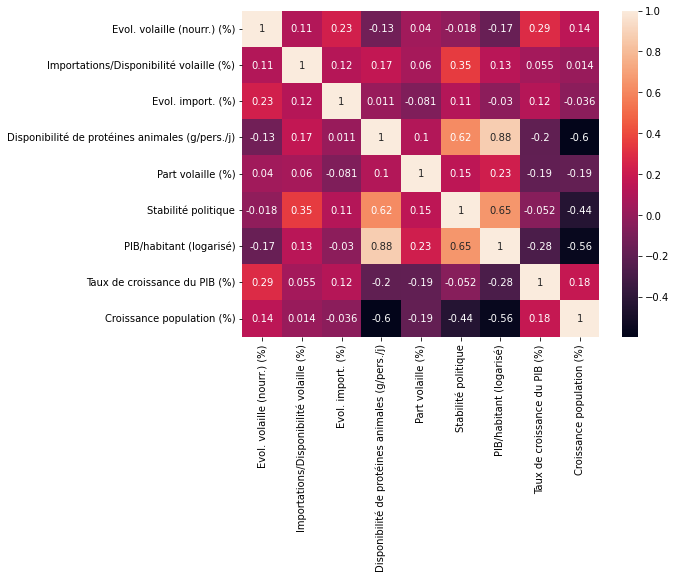

In [190]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_lpqc, annot=True)
plt.savefig('correl_variables.png', bbox_inches='tight')
plt.show()

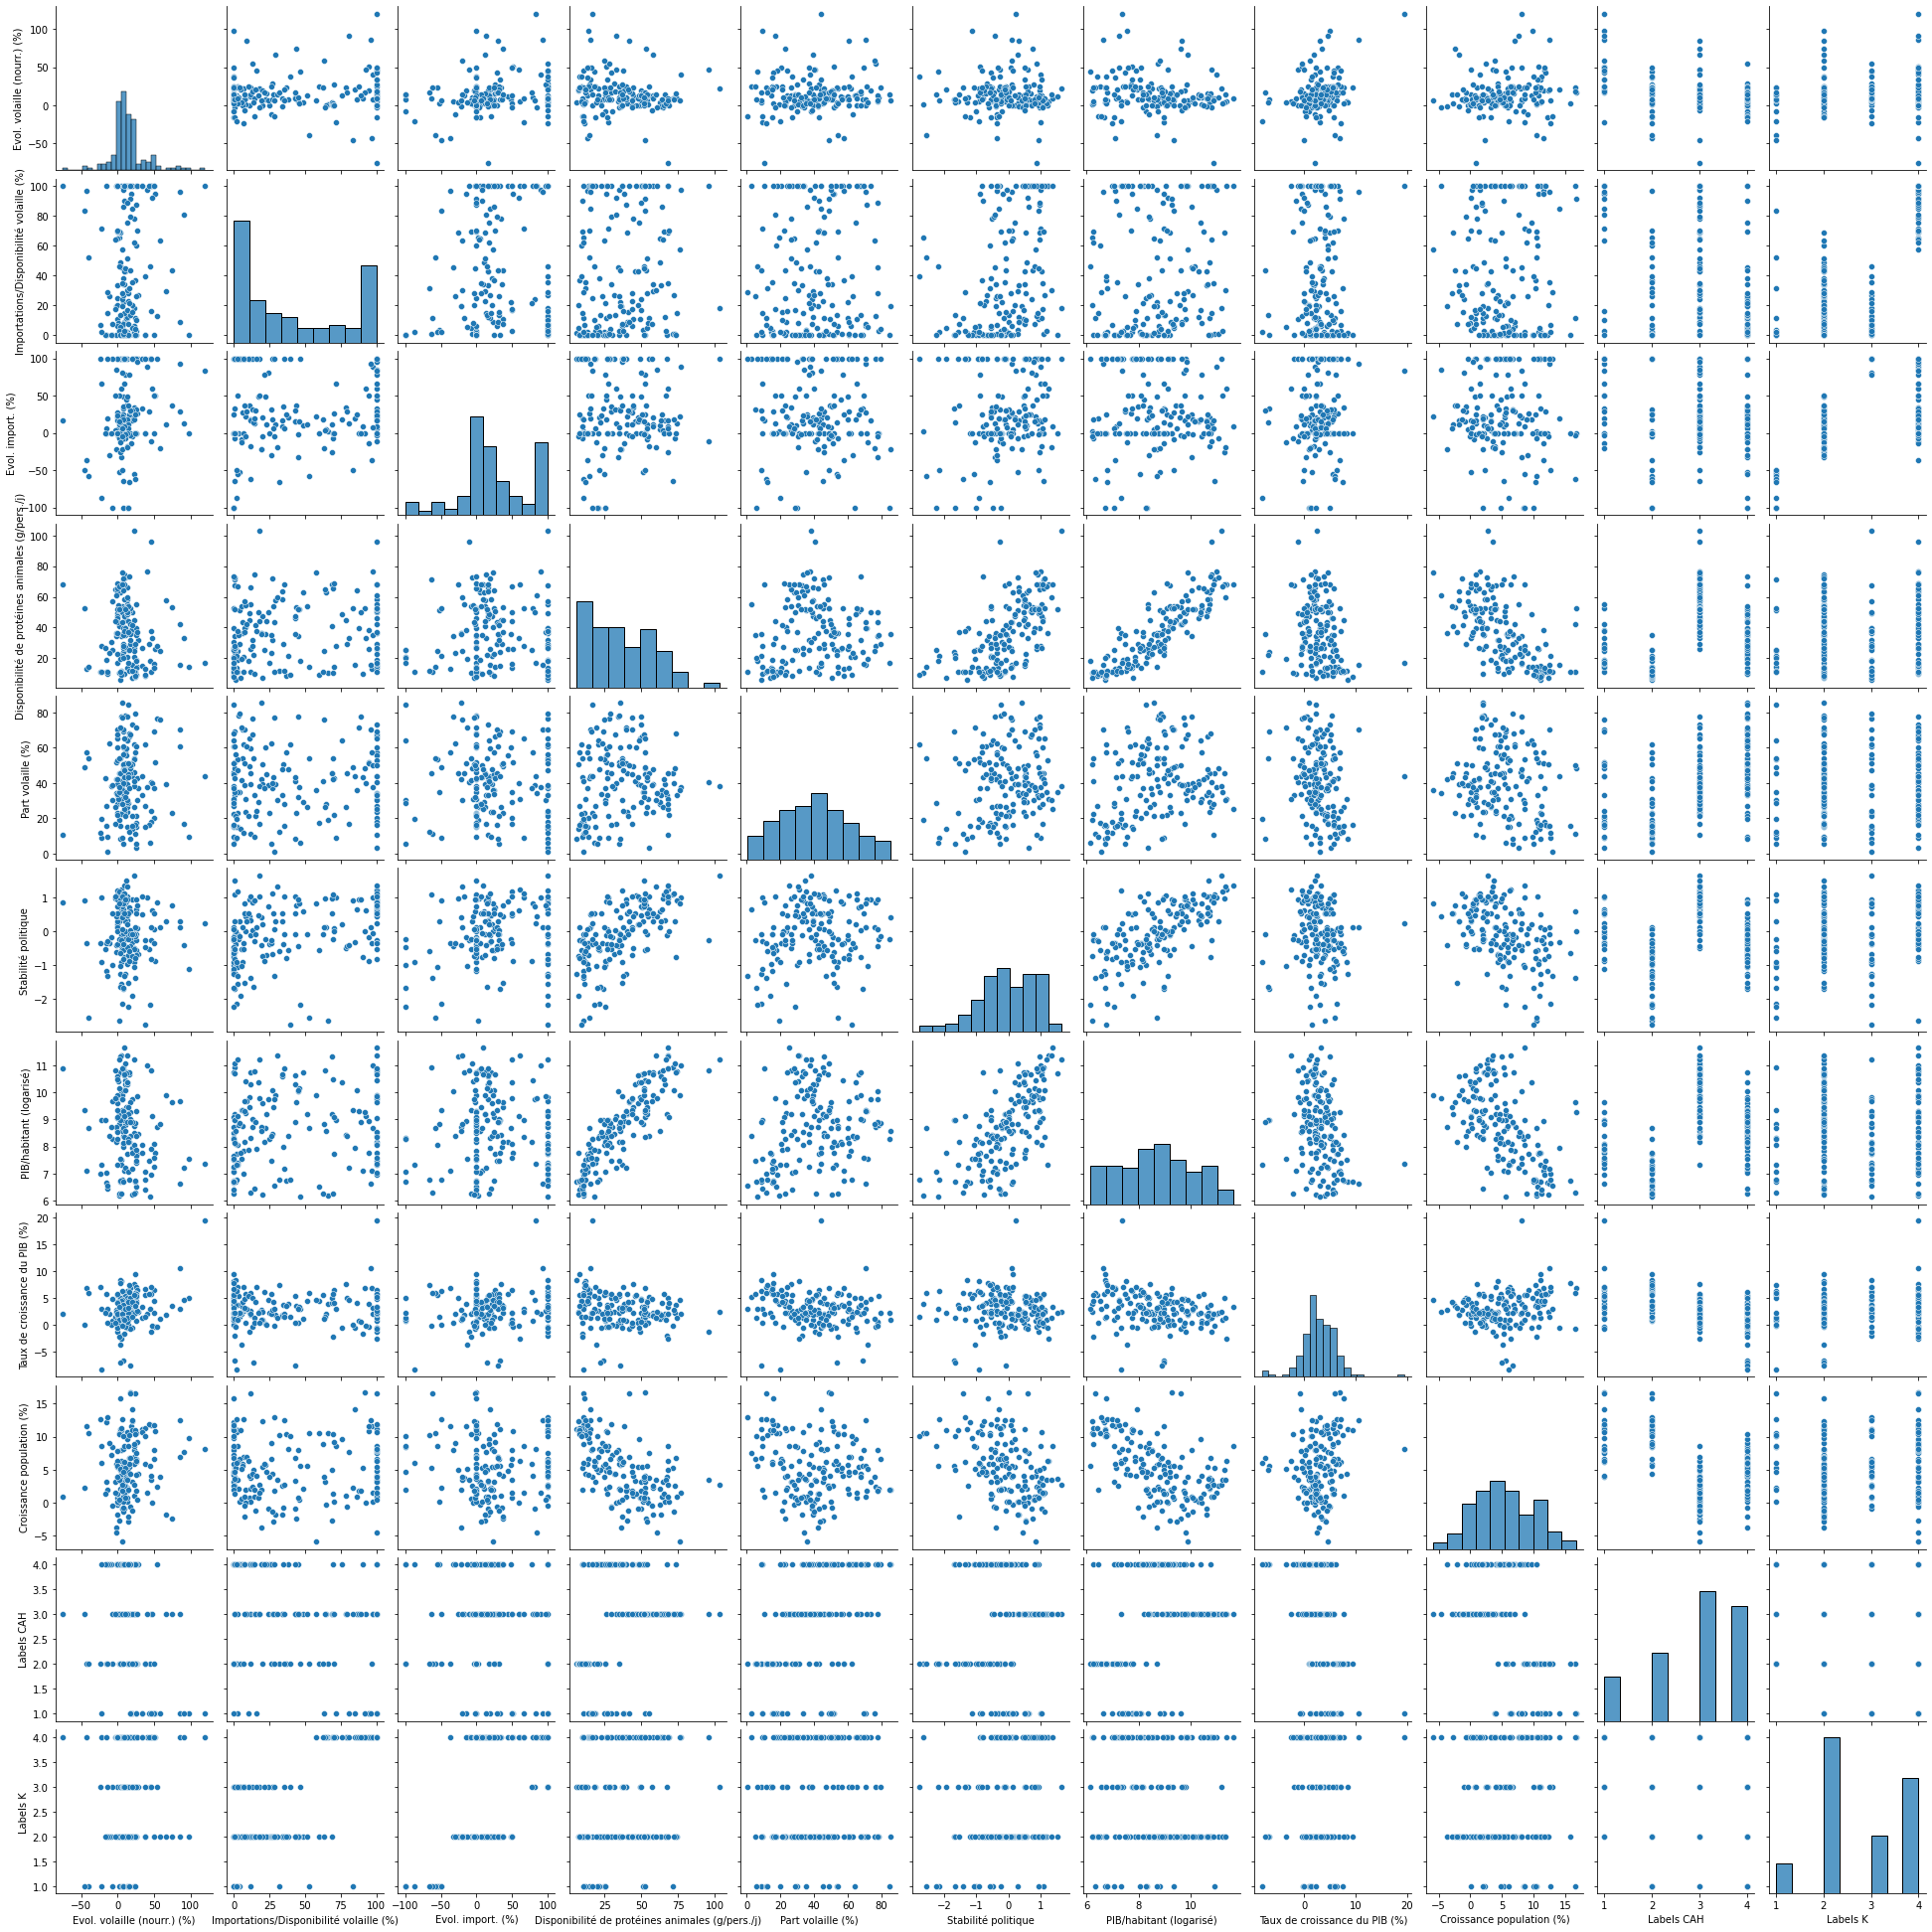

In [249]:
sns.pairplot(lpqc)

<br>

<br>

# Classification ascendante hiérarchique:

In [192]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing

In [193]:
X = lpqc.values
names = lpqc.index

In [194]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [195]:
Z = linkage(X_scaled, 'ward')

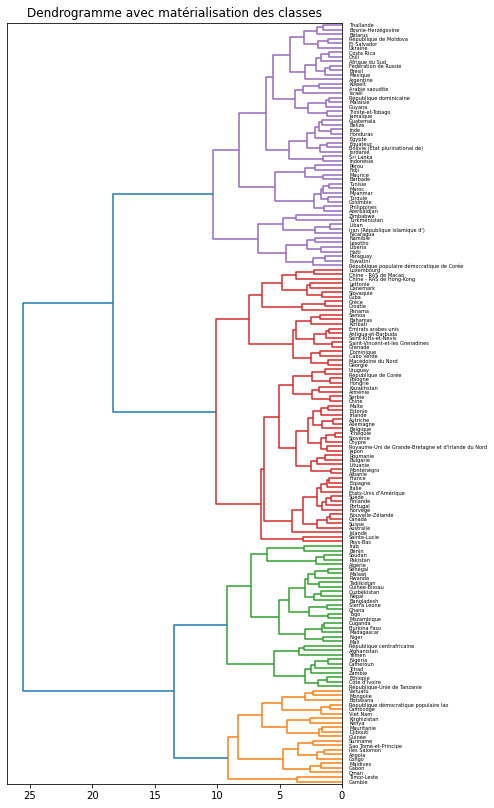

In [196]:
plt.figure(figsize=(6,14))
plt.title('Dendrogramme avec matérialisation des classes')
dendrogram(Z,labels=lpqc.index,orientation='left',color_threshold=13)
plt.show()

>> ### Récupération du numéro de cluster pour chaque pays:

In [197]:
groupes_cah = fcluster(Z,t=13,criterion='distance')

In [198]:
ff = pd.DataFrame(groupes_cah, lpqc.index)

In [199]:
ff

,0
Zone,
Afghanistan,2
Afrique du Sud,4
Albanie,3
Algérie,2
Allemagne,3
...,...
Vanuatu,1
Viet Nam,1
Yémen,2


In [200]:
lpqc['Labels CAH'] = ff[0]
lpqc.head()

,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Part volaille (%),Stabilité politique,PIB/habitant (logarisé),Taux de croissance du PIB (%),Croissance population (%),Labels CAH
Zone,,,,,,,,,,
Afghanistan,1.52,65.67,2.33,10.7,19.21,-2.65,6.21,3.91,10.54,2
Afrique du Sud,7.31,22.32,48.33,36.0,59.93,-0.22,8.70,0.15,5.73,4
Albanie,0.00,64.71,4.76,62.7,28.22,0.12,8.58,2.11,-0.35,3
Algérie,-8.01,0.00,-100.00,25.6,30.03,-1.00,8.29,0.80,8.37,2
Allemagne,3.72,48.54,10.80,63.0,29.43,0.58,10.75,1.06,2.12,3


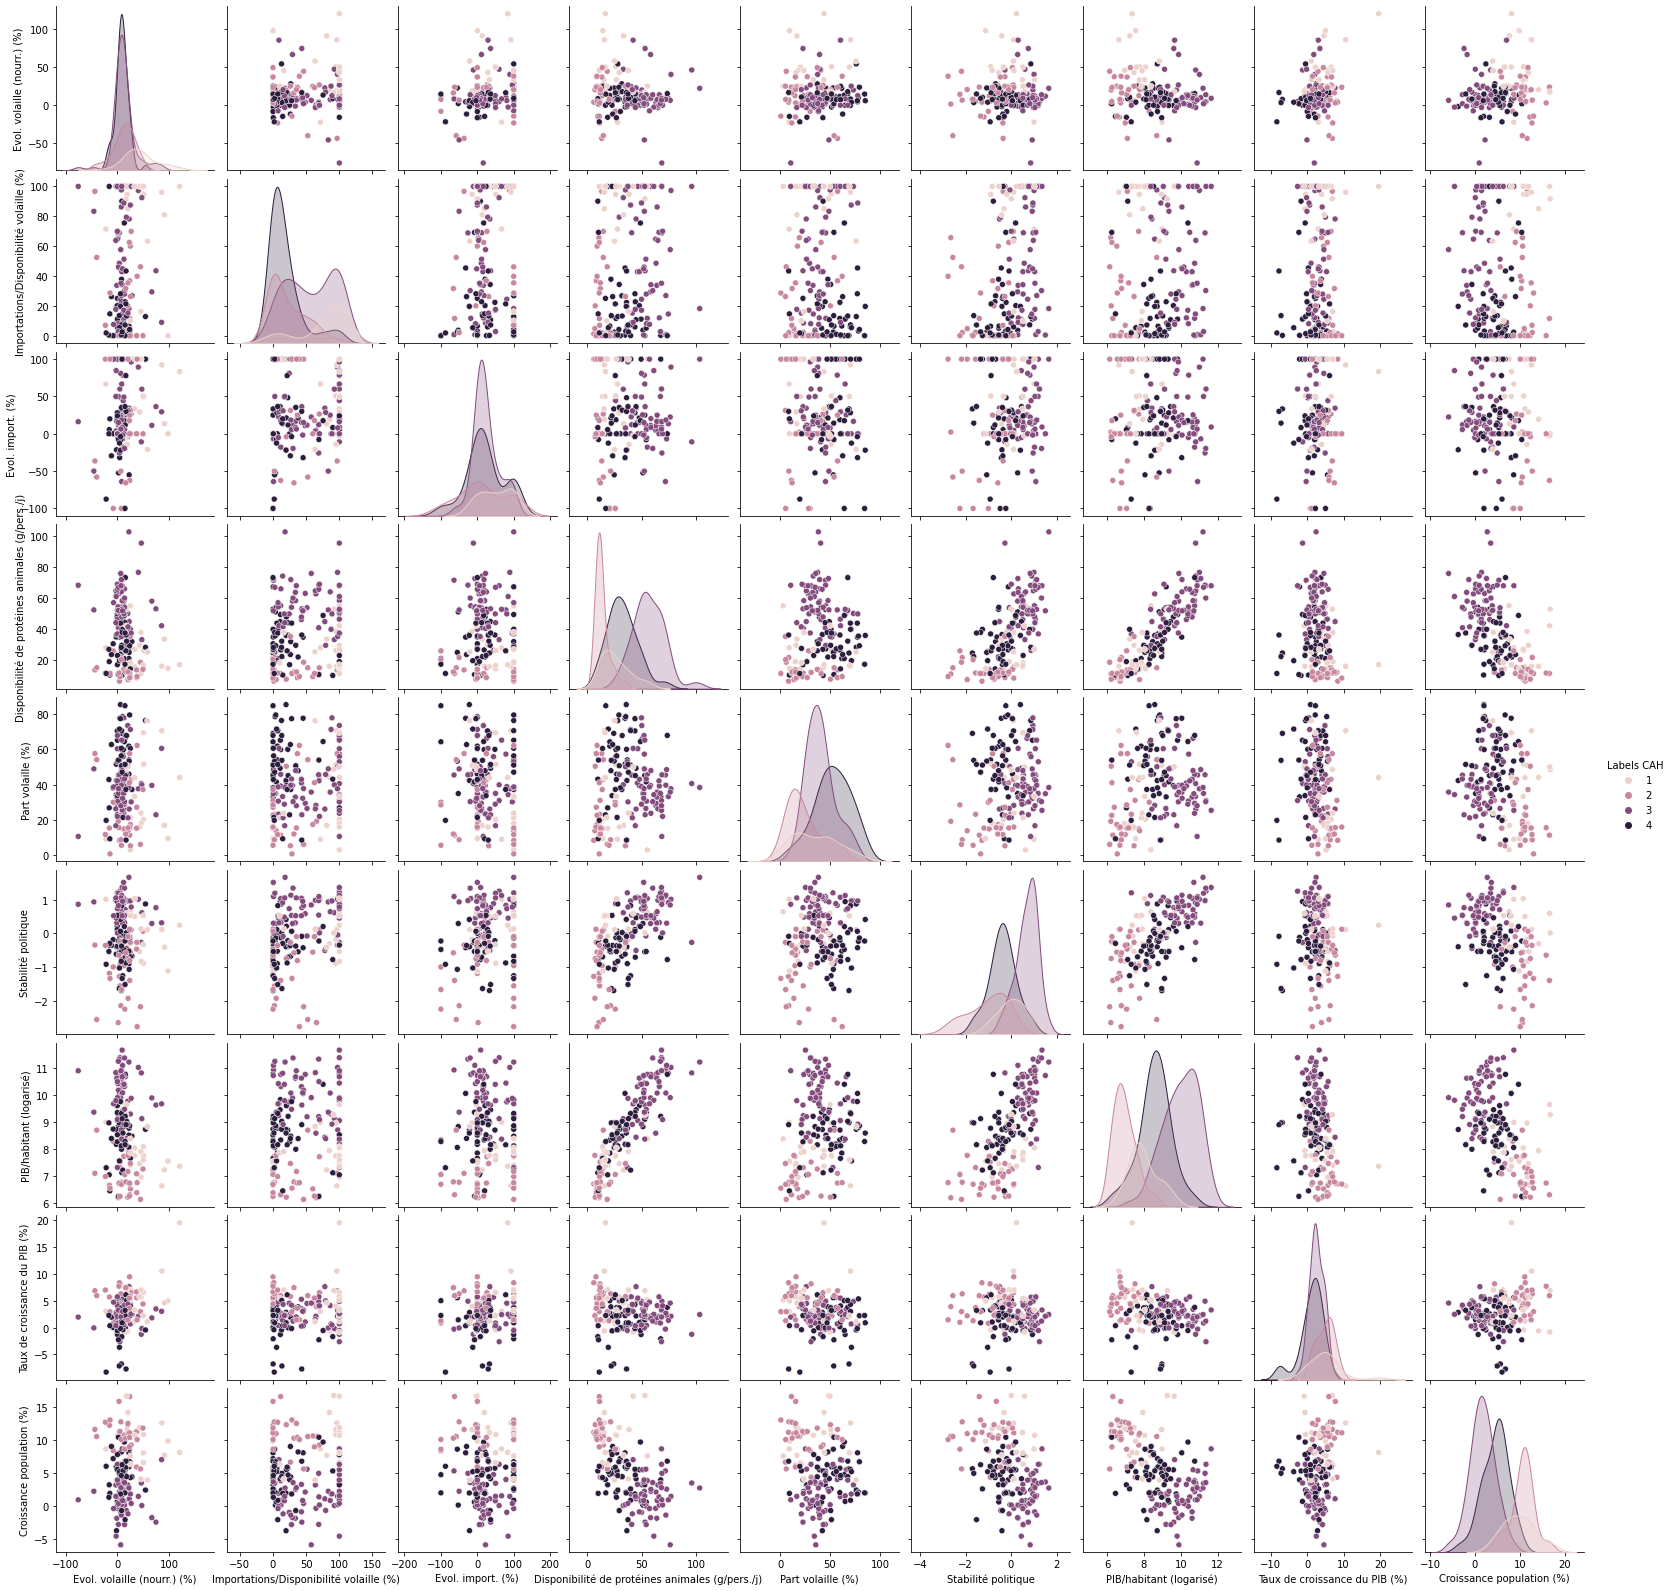

In [201]:
#sns.pairplot(lpqc, hue='Labels CAH')

<br>

In [202]:
lpqc.drop(['Labels CAH'], axis=1, inplace=True)

<br>

# K-means:

>> ### Nombre optimal de clusters:

>>> #### Méthode du coude:

In [203]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [204]:
distortions = []
inertias = []
K = range(1, 8)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(lpqc)
    kmeanModel.fit(lpqc)
  
    distortions.append(sum(np.min(cdist(lpqc, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / lpqc.shape[0])
    inertias.append(kmeanModel.inertia_)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\steph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


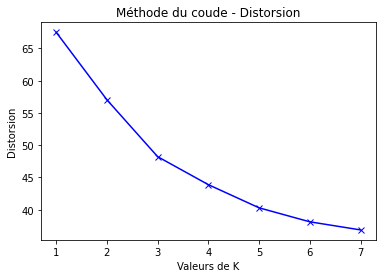

In [205]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valeurs de K')
plt.ylabel('Distorsion')
plt.title('Méthode du coude - Distorsion')
plt.show()

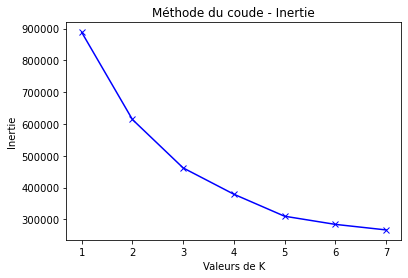

In [206]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valeurs de K')
plt.ylabel('Inertie')
plt.title('Méthode du coude - Inertie')
plt.show()

>>>> #### Indice de Davies-Bouldin (= indice d'homogénéité intra-clusters et d'éloignement inter-clusters):

In [207]:
from sklearn.metrics import davies_bouldin_score
results = {}

In [208]:
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(lpqc)
    db_index = davies_bouldin_score(lpqc, labels)
    results.update({i: db_index})

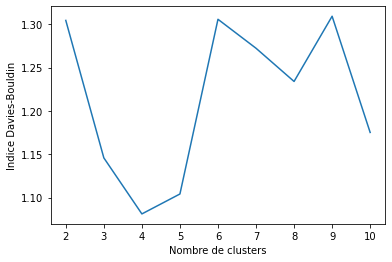

In [209]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Nombre de clusters")
plt.ylabel("Indice Davies-Bouldin")
plt.show()

>> ### Algorithme:

In [210]:
model=KMeans(n_clusters=4, random_state=100)
model.fit(lpqc)

KMeans(n_clusters=4, random_state=100)

In [211]:
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([14, 73, 27, 54], dtype=int64))

>> ### Récupération du numéro de cluster pour chaque pays:

In [212]:
model.labels_=(model.labels_)+1
model.labels_

array([4, 2, 4, 1, 2, 4, 4, 2, 3, 4, 1, 4, 3, 4, 2, 3, 1, 4, 2, 4, 2, 2,
       4, 2, 4, 2, 4, 3, 3, 2, 2, 2, 4, 4, 2, 3, 4, 2, 3, 2, 4, 4, 4, 4,
       1, 2, 4, 2, 2, 4, 2, 2, 3, 2, 3, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 3, 4, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 1, 4, 3, 3, 4, 2, 4, 4, 2, 3, 4, 2,
       2, 1, 3, 2, 2, 4, 2, 2, 1, 2, 2, 4, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 2, 2, 1, 4, 4, 4, 4, 2, 2, 4, 4, 2, 1, 1, 2, 2, 2, 1, 3, 2,
       2, 4, 2, 2, 3, 2, 3, 2, 2, 4, 3, 3, 3, 1])

In [213]:
lpqc['Labels K'] = model.labels_

In [214]:
# sns.pairplot(lpqc, hue='Labels K')

<br>
<br>

# Analyse en composantes principales:

In [215]:
lpqc = lpqc.drop(['Labels K'], axis=1)

In [216]:
colonnes = lpqc.columns

In [217]:
lpqc.columns=[i+1 for i in range(lpqc.shape[1])]
lpqc.head(0)

,1,2,3,4,5,6,7,8,9
Zone,,,,,,,,,


In [218]:
from sklearn import decomposition

In [219]:
n_comp = lpqc.shape[1]

In [220]:
X = lpqc.values
names = lpqc.index
features = lpqc.columns

In [221]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [222]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=9)

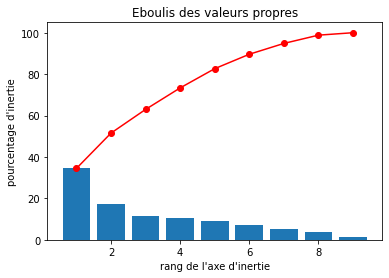

In [223]:
fc.display_scree_plot(pca)

<br>

>> ### Cercle des corrélations:

In [224]:
lpqc.columns=colonnes
lpqc.head(0)

,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Part volaille (%),Stabilité politique,PIB/habitant (logarisé),Taux de croissance du PIB (%),Croissance population (%)
Zone,,,,,,,,,


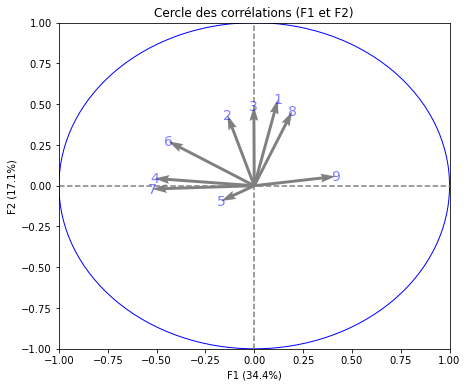

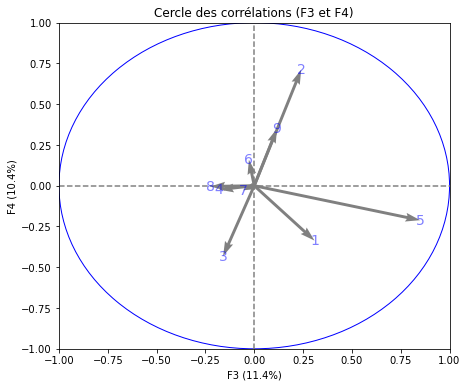

In [225]:
pcs = pca.components_
fc.display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

In [226]:
lpqc.columns=colonnes
lpqc.head(0)

,Evol. volaille (nourr.) (%),Importations/Disponibilité volaille (%),Evol. import. (%),Disponibilité de protéines animales (g/pers./j),Part volaille (%),Stabilité politique,PIB/habitant (logarisé),Taux de croissance du PIB (%),Croissance population (%)
Zone,,,,,,,,,


>> ### Variables latentes:
L'axe F1 peut être interprété comme un indice de développement inversé.
<br>
L'axe F2 comme un indice du potentiel du marché de la volaille.
<br>

>> ### Projection clusters CAH:

>>>> #### Centroïdes:

In [227]:
projection_pays = pca.transform(X_scaled)

In [228]:
df_proj_cah = pd.DataFrame(projection_pays)

In [229]:
df_proj_cah['c']=np.array(ff[0])

In [230]:
centroid_cah = df_proj_cah.groupby(by='c').mean()
centroid_cah

,0,1,2,3,4,5,6,7,8
c,,,,,,,,,
1,1.08,1.72,0.39,0.47,-0.08,0.44,0.16,-0.04,-2.79e-02
2,2.51,-0.26,-0.51,0.25,0.15,-0.08,0.16,0.05,4.55e-02
3,-1.76,0.29,-0.27,0.17,0.15,0.02,-0.12,0.01,-1.40e-02
4,0.09,-0.84,0.45,-0.53,-0.23,-0.15,-0.02,-0.03,-2.66e-04


>>>> #### Projection:

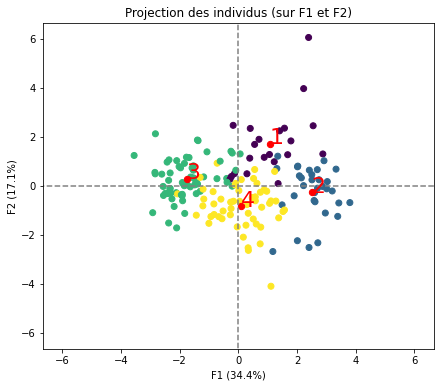

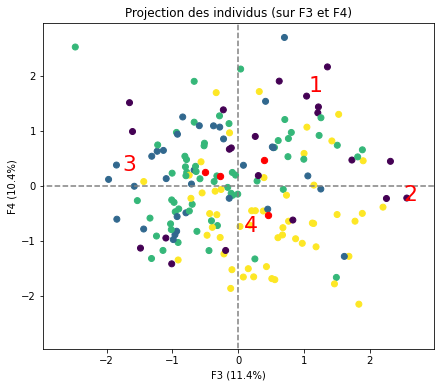

In [231]:
fc.display_factorial_planes(projection_pays, n_comp, pca, [(0,1),(2,3)], clusters = ff[0],
                            centroids=centroid_cah, centroids_color='red', labels_centroids=df_proj_cah.index)
plt.show()

<b>

>> ### Projection clusters k-means:

>>>> #### Centroïdes:

In [232]:
projection_pays = pca.transform(X_scaled)

In [233]:
df_projection_pays = pd.DataFrame(projection_pays)

In [234]:
df_projection_pays['c']=model.labels_

In [235]:
centroid_proj = df_projection_pays.groupby(by='c').mean()
centroid_proj

,0,1,2,3,4,5,6,7,8
c,,,,,,,,,
1,1.16,-1.83,5.34e-03,0.66,1.07,0.33,-0.09,0.04,0.08
2,-0.20,-0.46,-6.45e-02,-0.35,0.30,0.13,0.07,-0.13,-0.05
3,0.79,0.41,-4.71e-01,-1.14,-0.88,-0.38,0.32,0.16,0.04
4,-0.43,0.89,3.21e-01,0.88,-0.24,-0.07,-0.23,0.09,0.03


>>>> #### Projection:

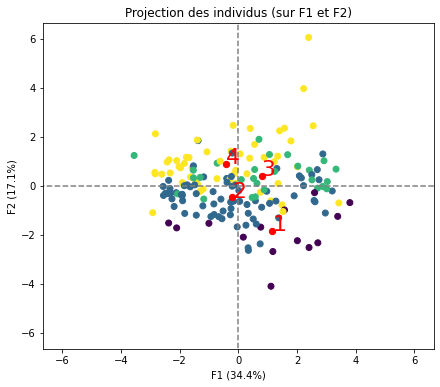

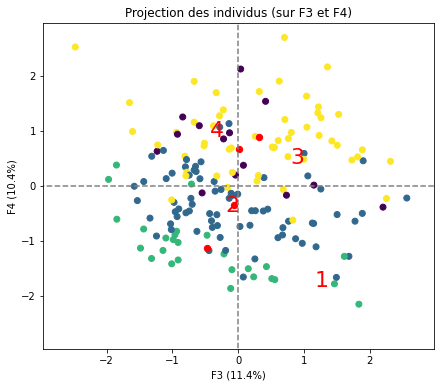

In [236]:
fc.display_factorial_planes(projection_pays, n_comp, pca, [(0,1),(2,3)], clusters = model.labels_,
                            centroids=centroid_proj, centroids_color='red', labels_centroids=centroid_proj.index)
plt.show()

<b>

# Résultats et recommandations:

> ## Comparaison des clusters:

In [237]:
lpqc['Labels CAH'] = ff[0]
lpqc['Labels K']= model.labels_

In [238]:
pd.crosstab(lpqc['Labels CAH'], lpqc['Labels K'])

Labels K,1,2,3,4
Labels CAH,,,,
1,0,2,3,16
2,7,12,9,4
3,2,27,3,29
4,5,32,12,5


> ## Heatmap finale:

In [239]:
centroid_cah.columns= colonnes

In [240]:
centroides_cah = lpqc.groupby(by='Labels CAH').mean()
centroides_cah = centroides_cah.drop(columns='Labels K')

In [241]:
df_norm_col=(centroides_cah-centroides_cah.mean())/centroides_cah.std()

<AxesSubplot:ylabel='Labels CAH'>

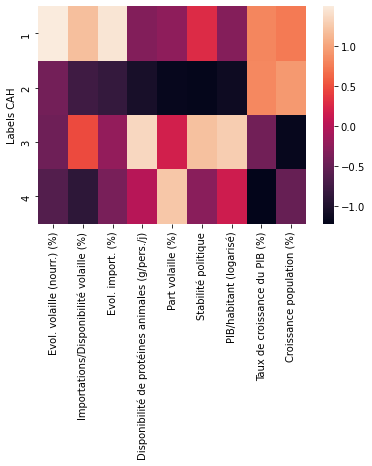

In [242]:
sns.heatmap(df_norm_col)

> ## Clusters CAH 1 et 3:

In [243]:
lpqc.loc[lpqc['Labels CAH']==1].index

Index(['Angola', 'Botswana', 'Cambodge', 'Congo', 'Djibouti', 'Gabon',
       'Gambie', 'Guinée', 'Îles Salomon', 'Kenya', 'Kirghizistan', 'Maldives',
       'Mauritanie', 'Mongolie', 'Oman',
       'République démocratique populaire lao', 'Sao Tomé-et-Principe',
       'Suriname', 'Timor-Leste', 'Vanuatu', 'Viet Nam'],
      dtype='object', name='Zone')

In [244]:
lpqc.loc[lpqc['Labels CAH']==3].index

Index(['Albanie', 'Allemagne', 'Antigua-et-Barbuda', 'Arménie', 'Australie',
       'Autriche', 'Bahamas', 'Belgique', 'Bulgarie', 'Cabo Verde', 'Canada',
       'Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chypre',
       'Croatie', 'Cuba', 'Danemark', 'Dominique', 'Émirats arabes unis',
       'Espagne', 'Estonie', 'États-Unis d'Amérique', 'Finlande', 'France',
       'Géorgie', 'Grèce', 'Grenade', 'Hongrie', 'Irlande', 'Islande',
       'Italie', 'Japon', 'Kazakhstan', 'Kiribati', 'Lettonie', 'Lituanie',
       'Luxembourg', 'Macédoine du Nord', 'Malte', 'Monténégro', 'Norvège',
       'Nouvelle-Zélande', 'Panama', 'Pays-Bas', 'Pologne', 'Portugal',
       'République de Corée', 'Roumanie',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord', 'Sainte-Lucie',
       'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Samoa',
       'Serbie', 'Slovaquie', 'Slovénie', 'Suède', 'Suisse', 'Tchéquie',
       'Uruguay'],
      dtype='object', name='Zone')

<br>
<br>
<br>

>> ## Vrac:

In [245]:
pca.components_[0]

array([ 0.12136769, -0.13731721, -0.00203107, -0.51057232, -0.16938304,
       -0.43940057, -0.52297368,  0.19438871,  0.41554028])

In [246]:
pca.components_[1]

array([ 0.52906657,  0.43243033,  0.48731818,  0.0446941 , -0.09392163,
        0.27208612, -0.02021637,  0.45512071,  0.05674778])

In [247]:
pcs.T

array([[ 0.12136769,  0.52906657,  0.30849262, -0.33646653,  0.24637904,
         0.64593588, -0.12992552, -0.03863892, -0.02591566],
       [-0.13731721,  0.43243033,  0.24036886,  0.71151832, -0.22510788,
        -0.04951949, -0.3613453 ,  0.2063511 , -0.06193178],
       [-0.00203107,  0.48731818, -0.15939949, -0.43132885, -0.67458736,
        -0.25572858,  0.14302785,  0.10001869, -0.01175463],
       [-0.51057232,  0.0446941 , -0.18008375, -0.0238339 ,  0.10867125,
         0.17103065,  0.12951741,  0.44575793,  0.66916688],
       [-0.16938304, -0.09392163,  0.84927628, -0.21138074,  0.05933279,
        -0.38929891,  0.1534992 ,  0.09272849,  0.09644423],
       [-0.43940057,  0.27208612, -0.02737529,  0.1592096 ,  0.06758921,
        -0.05360292,  0.29114386, -0.77642258,  0.10844738],
       [-0.52297368, -0.02021637, -0.05768811, -0.02819932,  0.08351724,
         0.14497489,  0.30018528,  0.29451613, -0.71911258],
       [ 0.19438871,  0.45512071, -0.22413272, -0.00452525,  0

<AxesSubplot:>

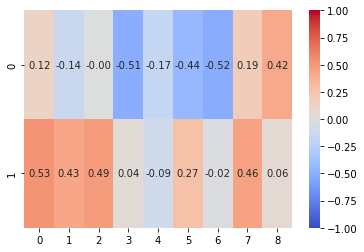

In [248]:
sns.heatmap([pcs[0], pcs[1]], vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")